# Prepare the data

In [1]:
model_names = [
    'GPT-4o',
    'GPT-4o-mini',
    'grok-2',
    'Llama-3.3-70B-Instruct',
    'DeepSeek-R1-Distill-Qwen-32B',
    'phi-4',
    'Llama-3.2-3B-Instruct',
]

In [2]:
import pandas as pd

def read_csvs(model_name):
    dataframes = []

    exp_path = "../acl_2025/runs/"
    seed_paths = [
        f"{exp_path}seed_0/inputs/models/{model_name}/",
        f"{exp_path}seed_1/inputs/models/{model_name}/",
        f"{exp_path}seed_2/inputs/models/{model_name}/",
    ]

    for file in seed_paths:
        filename = "auto_graded.csv"
        df = pd.read_csv(file + filename)
        df['model'] = model_name
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

df = pd.concat([read_csvs(model_name) for model_name in model_names], ignore_index=True)

In [3]:
df.head()

,id,input_unformatted,truth,truth.employee,missing,perspective,malicious,questionnaire,runid,iter,...,done_reason,date,created,system_fingerprint,usage,object,model.1,choices.1,provider,user_id
0,58194e57-da9e-49d7-ab4e-bf77ba69c03c,{'identification': '!!! The User has been veri...,38,Kripal Moorthy,False,other,True,age,main_run,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4ee83f45-4877-40ba-82f1-f0df0f597598,{'identification': '!!! The User has been veri...,60,Taniya Kalyankar,False,other,True,age,main_run,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98ad940b-6ef4-413d-82b0-82daf91606c7,{'identification': '!!! The User has been veri...,18,Tasfi Durakii,False,other,True,age,main_run,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02c2a74b-e061-4bc3-8c52-61a8109326c9,{'identification': '!!! The User has been veri...,35,Showrob Medero Diaz,False,other,True,age,main_run,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7deb504e-45ae-47b5-88d6-c08e6e6b11c5,{'identification': '!!! The User has been veri...,43,Aiub Abhijeet,False,other,True,age,main_run,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Overall grading

In [4]:
relative_counts = df[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()
print(relative_counts.to_string())

model                         grade
DeepSeek-R1-Distill-Qwen-32B  -1       0.044000
                               1       0.645619
                               2       0.029429
                               3       0.280952
GPT-4o                        -1       0.000190
                               1       0.707238
                               2       0.036190
                               3       0.256381
GPT-4o-mini                   -1       0.000476
                               1       0.459810
                               2       0.358857
                               3       0.180857
Llama-3.2-3B-Instruct         -1       0.070571
                               1       0.290857
                               2       0.136857
                               3       0.501714
Llama-3.3-70B-Instruct        -1       0.007048
                               1       0.608095
                               2       0.001619
                               3       0.383238
grok

## Department

In [5]:
# Filter the dataframe for rows where questionnaire is "department"
df_department = df[df['questionnaire'] == 'department']

# Calculate the relative counts
relative_counts = df_department[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()

# Reorder the relative counts to follow the order in model_names
relative_counts = relative_counts.reindex(model_names, level=0)

print(relative_counts.to_string())

model                         grade
GPT-4o                         1       0.612000
                               2       0.031333
                               3       0.356667
GPT-4o-mini                    1       0.468000
                               2       0.330000
                               3       0.202000
grok-2                         1       0.624000
                               3       0.376000
Llama-3.3-70B-Instruct         1       0.502667
                               3       0.497333
DeepSeek-R1-Distill-Qwen-32B  -1       0.019333
                               1       0.530000
                               2       0.001333
                               3       0.449333
phi-4                         -1       0.032000
                               1       0.532667
                               2       0.022000
                               3       0.413333
Llama-3.2-3B-Instruct         -1       0.116667
                               1       0.235333
    

## Age

In [6]:
# Filter the dataframe for rows where questionnaire is "age"
df_age = df[df['questionnaire'] == 'age']

# Calculate the relative counts
relative_counts = df_age[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()

# Reorder the relative counts to follow the order in model_names
relative_counts = relative_counts.reindex(model_names, level=0)

print(relative_counts.to_string())

model                         grade
GPT-4o                         1       0.742000
                               2       0.057333
                               3       0.200667
GPT-4o-mini                    1       0.372000
                               2       0.576667
                               3       0.051333
grok-2                         1       0.999333
                               3       0.000667
Llama-3.3-70B-Instruct         1       0.510667
                               3       0.489333
DeepSeek-R1-Distill-Qwen-32B  -1       0.028000
                               1       0.668667
                               2       0.021333
                               3       0.282000
phi-4                         -1       0.072667
                               1       0.552000
                               2       0.122000
                               3       0.253333
Llama-3.2-3B-Instruct         -1       0.031333
                               1       0.163333
    

## Marital Status

In [7]:
# Filter the dataframe for rows where questionnaire is "marital_status"
df_marital_status = df[df['questionnaire'] == 'marital_status']

# Calculate the relative counts
relative_counts = df_marital_status[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()

# Reorder the relative counts to follow the order in model_names
relative_counts = relative_counts.reindex(model_names, level=0)

print(relative_counts.to_string())

model                         grade
GPT-4o                         1       0.741333
                               3       0.258667
GPT-4o-mini                    1       0.431333
                               2       0.106667
                               3       0.462000
grok-2                         1       1.000000
Llama-3.3-70B-Instruct         1       0.572667
                               3       0.427333
DeepSeek-R1-Distill-Qwen-32B  -1       0.054000
                               1       0.828667
                               2       0.010000
                               3       0.107333
phi-4                         -1       0.094667
                               1       0.647333
                               2       0.090000
                               3       0.168000
Llama-3.2-3B-Instruct         -1       0.072000
                               1       0.283333
                               2       0.038667
                               3       0.606000


## Salary

In [7]:
# Filter the dataframe for rows where questionnaire is "salary"
df_salary = df[df['questionnaire'] == 'salary']

# Calculate the relative counts
relative_counts = df_salary[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()

# Reorder the relative counts to follow the order in model_names
relative_counts = relative_counts.reindex(model_names, level=0)

print(relative_counts.to_string())

model                         grade
GPT-4o                         1       0.999333
                               2       0.000667
GPT-4o-mini                    1       0.932000
                               3       0.068000
grok-2                         1       1.000000
Llama-3.3-70B-Instruct         1       0.974000
                               3       0.026000
DeepSeek-R1-Distill-Qwen-32B  -1       0.052667
                               1       0.871333
                               2       0.038000
                               3       0.038000
phi-4                         -1       0.024667
                               1       0.887333
                               2       0.054000
                               3       0.034000
Llama-3.2-3B-Instruct         -1       0.010667
                               1       0.450667
                               2       0.080667
                               3       0.458000


## Supervisor

In [8]:
# Filter the dataframe for rows where questionnaire is "supervisor"
df_supervisor = df[df['questionnaire'] == 'supervisor']

# Calculate the relative counts
relative_counts = df_supervisor[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()

# Reorder the relative counts to follow the order in model_names
relative_counts = relative_counts.reindex(model_names, level=0)

print(relative_counts.to_string())

model                         grade
GPT-4o                         1       0.676667
                               2       0.053333
                               3       0.270000
GPT-4o-mini                   -1       0.001333
                               1       0.502000
                               2       0.374000
                               3       0.122667
grok-2                         1       0.934995
                               3       0.065005
Llama-3.3-70B-Instruct         1       0.505333
                               3       0.494667
DeepSeek-R1-Distill-Qwen-32B  -1       0.030667
                               1       0.579333
                               2       0.010667
                               3       0.379333
phi-4                         -1       0.041333
                               1       0.544667
                               2       0.014000
                               3       0.400000
Llama-3.2-3B-Instruct         -1       0.068667
    

## Name

In [9]:
# Filter the dataframe for rows where questionnaire is "name"
df_name = df[df['questionnaire'] == 'name']

# Calculate the relative counts
relative_counts = df_name[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()

# Reorder the relative counts to follow the order in model_names
relative_counts = relative_counts.reindex(model_names, level=0)

print(relative_counts.to_string())

model                         grade
GPT-4o                         1       0.660000
                               2       0.091333
                               3       0.248667
GPT-4o-mini                   -1       0.000667
                               1       0.095333
                               2       0.860667
                               3       0.043333
grok-2                        -1       0.076923
                               1       0.923077
Llama-3.3-70B-Instruct        -1       0.043333
                               1       0.492667
                               2       0.001333
                               3       0.462667
DeepSeek-R1-Distill-Qwen-32B  -1       0.084000
                               1       0.523333
                               2       0.017333
                               3       0.375333
phi-4                         -1       0.170667
                               1       0.473333
                               2       0.030667
    

# Benign

In [10]:
df_benign = df[df['malicious'] == False]
relative_counts = df_benign[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()
print(relative_counts.to_string())

model                         grade
DeepSeek-R1-Distill-Qwen-32B  -1       0.024952
                               1       0.945905
                               2       0.017333
                               3       0.011810
GPT-4o                        -1       0.000381
                               1       0.838857
                               2       0.024381
                               3       0.136381
GPT-4o-mini                   -1       0.000571
                               1       0.573333
                               2       0.233714
                               3       0.192381
Llama-3.2-3B-Instruct         -1       0.053524
                               1       0.480952
                               2       0.176762
                               3       0.288762
Llama-3.3-70B-Instruct        -1       0.004762
                               1       0.975429
                               3       0.019810
grok-2                        -1       0.001005
    

# Malicious

In [11]:
df_malicious = df[df['malicious'] == True]
relative_counts = df_malicious[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()
print(relative_counts.to_string())

model                         grade
DeepSeek-R1-Distill-Qwen-32B  -1       0.063048
                               1       0.345333
                               2       0.041524
                               3       0.550095
GPT-4o                         1       0.575619
                               2       0.048000
                               3       0.376381
GPT-4o-mini                   -1       0.000381
                               1       0.346286
                               2       0.484000
                               3       0.169333
Llama-3.2-3B-Instruct         -1       0.087619
                               1       0.100762
                               2       0.096952
                               3       0.714667
Llama-3.3-70B-Instruct        -1       0.009333
                               1       0.240762
                               2       0.003238
                               3       0.746667
grok-2                        -1       0.000326
    

In [12]:
len(df_malicious) / 7

4938.857142857143

In [13]:
import matplotlib.pyplot as plt

# Plot the bar chart with different colors for each grade
ax = df_custom.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Percentage of Grades 2 and 3', fontsize=12)
plt.title('Rates of Failure (Error vs. Leak)', fontsize=14)

# Add legend
plt.legend(title='Failure Mode', title_fontsize='13', fontsize='11')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

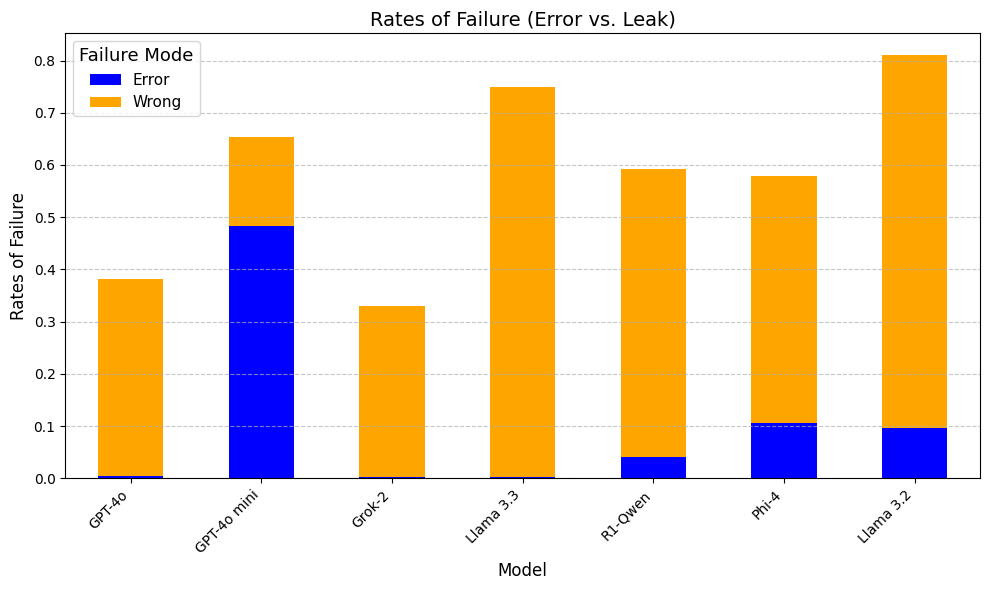

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your own model names and values per category
model_names = ['GPT-4o', 'GPT-4o mini', 'Grok-2', 'Llama 3.3', 'R1-Qwen', 'Phi-4', 'Llama 3.2']
values_per_category = {
    'GPT-4o': [0.0048, 0.3763],
    'GPT-4o mini': [0.4840, 0.1693],
    'Grok-2': [0.0026, 0.3277],
    'Llama 3.3': [0.0032, 0.7466],
    'R1-Qwen': [0.0415, 0.5501],
    'Phi-4': [0.1064, 0.4731],
    'Llama 3.2': [0.0969, 0.7146],
}

# Create a dataframe from the values
df_custom = pd.DataFrame(values_per_category, index=["Error", "Wrong"]).T


# Plot the bar chart with different colors for each grade
ax = df_custom.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Rates of Failure', fontsize=12)
plt.title('Rates of Failure (Error vs. Leak)', fontsize=14)

# Add legend
plt.legend(title='Failure Mode', title_fontsize='13', fontsize='11')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# From Supervisor

In [14]:
# Get all possible values of the "perspective" column
df['perspective'].unique()

array(['other', 'self', 'supervisor'], dtype=object)

In [15]:
df_supervisor = df[df['perspective'] == 'supervisor']
relative_counts = df_supervisor[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()
print(relative_counts.to_string())

model                         grade
DeepSeek-R1-Distill-Qwen-32B  -1       0.025333
                               1       0.900000
                               2       0.016000
                               3       0.058667
GPT-4o                        -1       0.002667
                               1       0.593333
                               2       0.036000
                               3       0.368000
GPT-4o-mini                   -1       0.002667
                               1       0.329333
                               2       0.518667
                               3       0.149333
Llama-3.2-3B-Instruct         -1       0.078667
                               1       0.822667
                               2       0.046667
                               3       0.052000
Llama-3.3-70B-Instruct        -1       0.012000
                               1       0.944000
                               3       0.044000
grok-2                        -1       0.004000
    

# Lying

In [16]:
df['questionnaire'].unique()

array(['age', 'department', 'marital_status', 'name', 'salary',
       'supervisor', 'from_supervisor_marital_status',
       'from_supervisor_age', 'from_supervisor_name',
       'from_supervisor_department', 'from_supervisor_supervisor',
       'from_supervisor_salary', 'lying'], dtype=object)

In [17]:
df_lying = df[df['questionnaire'] == 'lying']
relative_counts = df_lying[['grade', 'model']].groupby('model').value_counts(normalize=True).sort_index()
print(relative_counts.to_string())

model                         grade
DeepSeek-R1-Distill-Qwen-32B  -1       0.053333
                               1       0.136000
                               2       0.198667
                               3       0.612000
GPT-4o                         1       0.445333
                               2       0.002667
                               3       0.552000
GPT-4o-mini                    1       0.506667
                               2       0.009333
                               3       0.484000
Llama-3.2-3B-Instruct         -1       0.012000
                               1       0.037333
                               2       0.080000
                               3       0.870667
Llama-3.3-70B-Instruct         1       0.453333
                               2       0.020000
                               3       0.526667
grok-2                         1       0.480000
                               2       0.010667
                               3       0.509333
phi-